In [5]:
import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam

In [8]:
import os
os.getcwd()
os.chdir('E:/network assessment')

In [9]:
#https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz从这个网址下载数据集

#导入数据
x_train = np.load('E:/network assessment/x_train.npy')
y_train = np.load('E:/network assessment/y_train.npy')
print(x_train.shape, y_train.shape)   # 输出训练集样本和标签的大小

(60000, 28, 28) (60000,)


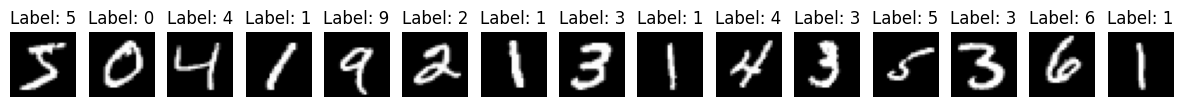

In [10]:
# 设置图形布局
fig, axes = plt.subplots(1, 15, figsize=(15, 5))

# 可视化前 5 张图片，确认数据准确
for i in range(15):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')  # 关闭坐标轴显示

plt.show()

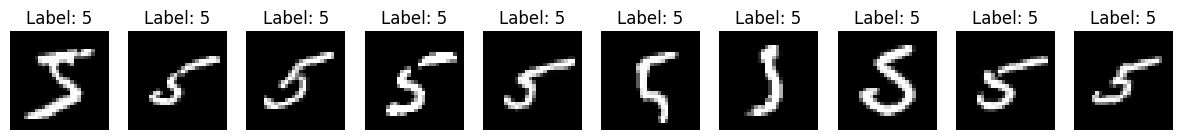

In [11]:
# 筛选标签为 5 的样本
indices = np.where(y_train == 5)[0]  # 找到标签为 5 的索引
selected_images = x_train[indices[:10]]  # 获取前 10 张图片

# 设置图形布局
fig, axes = plt.subplots(1, 10, figsize=(15, 5))

# 可视化标签为 5 的前 10 张图片
for i, img in enumerate(selected_images):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Label: 5")
    axes[i].axis('off')  # 关闭坐标轴显示

plt.show()

In [11]:
x_train = np.load('E:/network assessment/x_train.npy')
y_train = np.load('E:/network assessment/y_train.npy')
x_test = np.load('E:/network assessment/x_test.npy')
y_test = np.load('E:/network assessment/y_test.npy')

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 加载并预处理 MNIST 数据集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 数据归一化到 [0, 1] 范围，并调整形状以适配 CNN 输入
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 添加一个维度，将数据从 (28, 28) 转为 (28, 28, 1)，适配卷积层
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# 将标签转换为独热编码
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 检查数据形状
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28, 1), y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1), y_test shape: (10000, 10)


In [ ]:
# 构建卷积神经网络
model = models.Sequential([
    # 第一层卷积层 + 最大池化层
    layers.Conv2D(filters=16, kernel_size=(2, 2), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # 第二层卷积层 + 最大池化层
    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # 第三层卷积层
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),

    # Flatten 将多维特征展开为一维
    layers.Flatten(),

    layers.Dropout(0.5),

    # 全连接层
    layers.Dense(64, activation='relu'),

    # 输出层
    layers.Dense(10, activation='softmax')  # 输出概率分布，10 类
])

# 编译模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 打印模型结构
model.summary()

# 训练模型
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=64, 
                    validation_split=0.2)

# 评估模型
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 可视化训练过程
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 27, 27, 16)        80        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 32)        2080      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 64)          8256      
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

In [ ]:
model.save('my_model.h5')

In [21]:
from tensorflow.keras.models import load_model

model = load_model('my_model.h5')

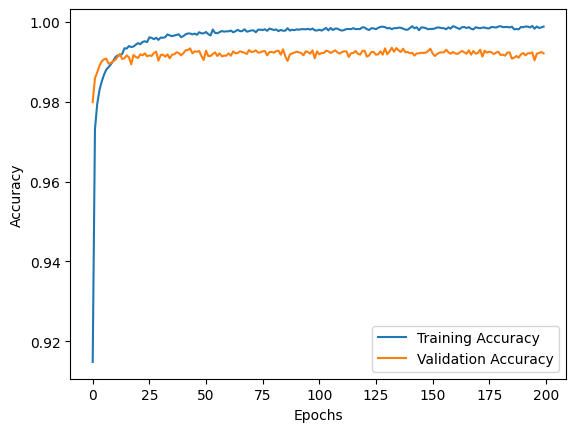

In [6]:
import pickle
with open('training_history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)

# 可视化加载的训练历史
plt.plot(loaded_history['accuracy'], label='Training Accuracy')
plt.plot(loaded_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [18]:
# 假设 `model` 是已经训练好的模型
# `x_test` 是测试集的输入数据
y_pred = model.predict(x_test)


313/313 [==============================] - 1s 2ms/step


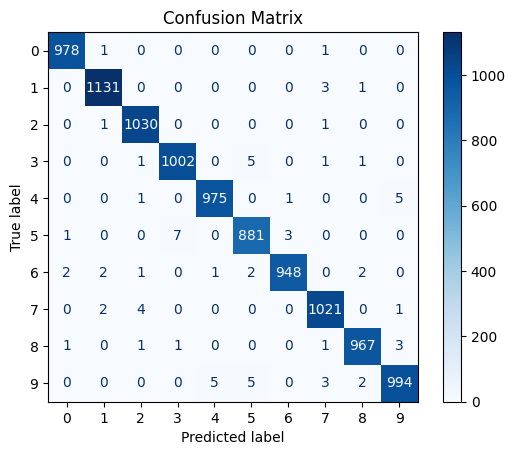

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# 假设 y_test 是真实标签，y_pred 是模型预测
y_pred_classes = np.argmax(y_pred, axis=1)  # 转换为类别
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


375/375 [==============================] - 1s 2ms/step
Fold 1 Accuracy: 0.9980
375/375 [==============================] - 1s 2ms/step
Fold 2 Accuracy: 0.9981
375/375 [==============================] - 1s 2ms/step
Fold 3 Accuracy: 0.9982
375/375 [==============================] - 1s 2ms/step
Fold 4 Accuracy: 0.9990
375/375 [==============================] - 1s 2ms/step
Fold 5 Accuracy: 0.9989


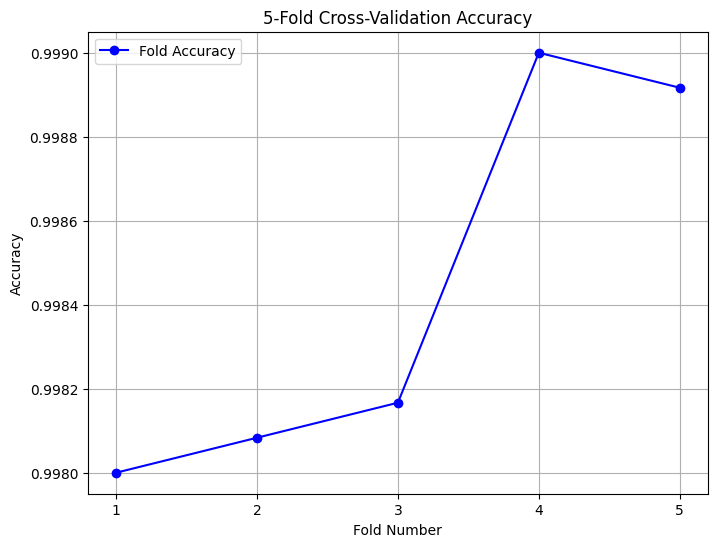

Mean accuracy: 0.9984


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# 假设 x_train 和 y_train 是你的训练数据和标签
# 这里 model 是您已经训练好的模型

# 确保 y_train 是整数格式，而不是 one-hot 编码
# 如果 y_train 是 one-hot 编码，可以使用 np.argmax 转换
y_train_int = np.argmax(y_train, axis=1)  # 将 one-hot 编码转换为整数标签

# 使用 StratifiedKFold 进行 5 折交叉验证
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []  # 用于存储每个折叠的准确率

# 进行交叉验证（不重新训练，只验证）
for fold, (train_index, test_index) in enumerate(skf.split(x_train, y_train_int), 1):
    X_train, X_test = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train_int[train_index], y_train_int[test_index]
    
    # 在验证集上评估已经训练好的模型
    y_pred = model.predict(X_test)
    
    # 计算准确率
    accuracy = np.mean(np.argmax(y_pred, axis=1) == y_test_fold)
    fold_accuracies.append(accuracy)
    print(f"Fold {fold} Accuracy: {accuracy:.4f}")

# 可视化每个折叠的准确率
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), fold_accuracies, marker='o', color='b', label='Fold Accuracy')
plt.title('5-Fold Cross-Validation Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(range(1, 6))  # 设置 x 轴刻度为折叠编号
plt.grid(True)
plt.legend()
plt.show()

# 打印总体结果
print(f"Mean accuracy: {np.mean(fold_accuracies):.4f}")
